In [3]:
pip install matplotlib


  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [5]:
(x_train, y_train) ,(x_test, y_test)= keras.datasets.mnist.load_data() 

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train[0].shape

(28, 28)

In [10]:
x_train_flat=x_train.reshape(60000,784)
x_test_flat=x_test.reshape(len(x_test),784)
x_test_flat.shape

(10000, 784)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer
    keras.layers.Dense(64, activation='relu'),  # Another hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=10)

Epoch 1/10


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8702 - loss: 0.4374
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9681 - loss: 0.1073
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9791 - loss: 0.0674
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9838 - loss: 0.0519
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0385
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0285
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9921 - loss: 0.0240
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0220
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9932 - loss: 0.0203
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9946 - loss: 0.0164


In [12]:
model.evaluate(x_train_flat,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step - accuracy: 0.9927 - loss: 0.0213


[0.024073490872979164, 0.9918500185012817]

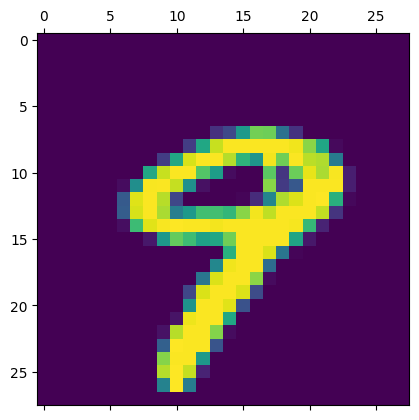

In [13]:
plt.matshow(x_test[9])

In [14]:
y_predicted=model.predict(x_test_flat)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step


array([3.85632688e-13, 5.22754240e-09, 1.02638946e-10, 6.62518502e-08,
       3.39889770e-12, 1.24724571e-11, 2.41934695e-18, 9.99999881e-01,
       1.01070999e-10, 3.36833956e-08], dtype=float32)

In [15]:
np.argmax(y_predicted[9])

np.int64(9)

In [16]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    5,    1,    1,    2,    0,    0,    1],
       [   2, 1117,    5,    1,    0,    0,    2,    2,    6,    0],
       [   2,    1, 1008,    4,    2,    0,    1,    6,    7,    1],
       [   0,    0,    5,  995,    0,    1,    0,    3,    5,    1],
       [   4,    0,    4,    1,  954,    0,    7,    4,    2,    6],
       [   1,    0,    0,   27,    1,  849,    2,    0,   12,    0],
       [   3,    3,    2,    1,    4,    2,  937,    0,    6,    0],
       [   2,    0,   10,    0,    1,    0,    0, 1008,    5,    2],
       [   4,    1,    2,    6,    2,    0,    1,    4,  949,    5],
       [   2,    2,    0,   15,    7,    8,    0,    9,    4,  962]],
      dtype=int32)>

In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Text(95.72222222222221, 0.5, 'Truth')

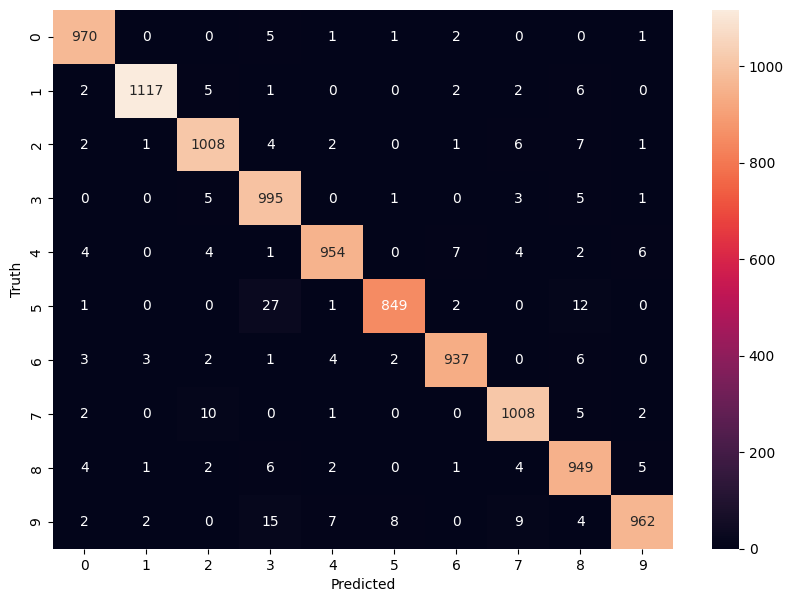

In [21]:
import seaborn as sm
plt.figure(figsize=(10,7))
sm.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer using Relu activation Function
    keras.layers.Dense(64, activation='relu'),  # Another hidden layer using Relu Activation Function
    keras.layers.Dense(10, activation='softmax')  # Output layer using Softmax (Softmax accuracy >= Sigmoid accuracy)
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8801 - loss: 0.4149
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9676 - loss: 0.1088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9770 - loss: 0.0746
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9827 - loss: 0.0566
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9870 - loss: 0.0392
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9900 - loss: 0.0307
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9915 - loss: 0.0276
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9925 - loss: 0.0228
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0.0192
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9942 - loss: 0.0163


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


Text(95.72222222222221, 0.5, 'Truth')

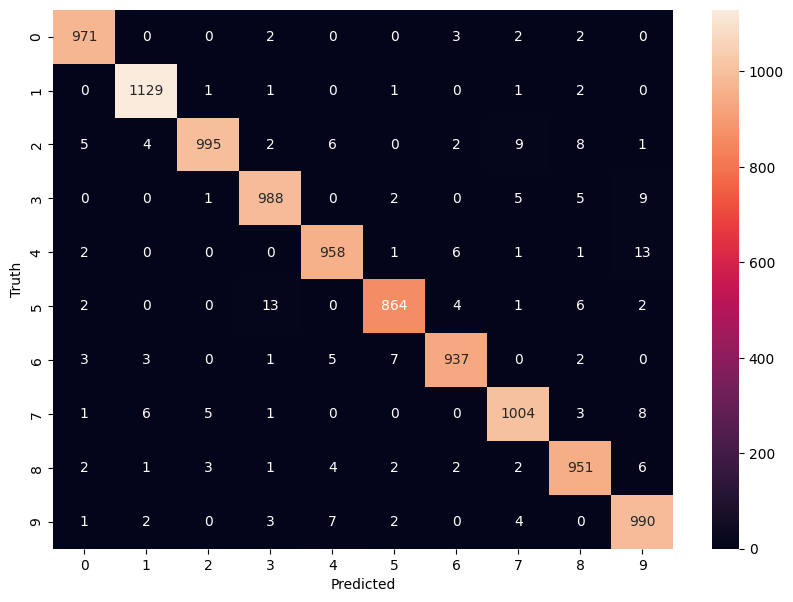

In [30]:
y_predicted=model.predict(x_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sm.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')